In [1]:
from google.colab import drive
drive.mount('/content/g-drive')

Mounted at /content/g-drive


In [2]:
import zipfile

zf = "/content/g-drive/MyDrive/dataset_final_080521/dataset_fin.zip"
target_dir = "/content"

zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

# 1 Set up

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.1 Define Constants

In [6]:
train_path = '/content/dataset_fin/train'
test_path = '/content/dataset_fin/test'
valid_path = '/content/dataset_fin/val'

In [7]:

#Define standard parameter values
batch_size = 10
img_height = 256
img_width = 256


# 2 Preparing Data

## 2.2 Image Data Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

image_gen = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                              
                               )  

test_data_gen = ImageDataGenerator(rescale = 1./255)



train = image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size
                                      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',shuffle=False,
      class_mode='categorical',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 9000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [9]:
type(train)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

['1861.png', '2141.png', '610.png', '2151.png', '539.png', '957.png', '1995.png', '1225.png', '2714.png', '1222.png']
['1861.png', '2141.png', '610.png', '2151.png', '539.png', '957.png', '1995.png', '1225.png', '2714.png', '1222.png']
['1861.png', '2141.png', '610.png', '2151.png', '539.png', '957.png', '1995.png', '1225.png', '2714.png', '1222.png']


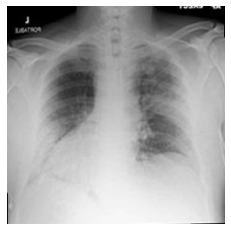

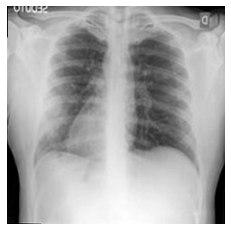

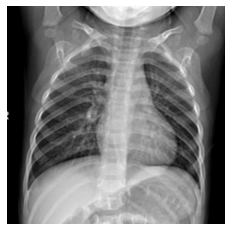

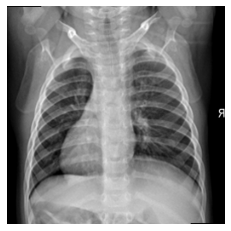

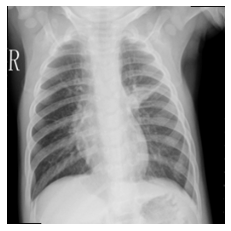

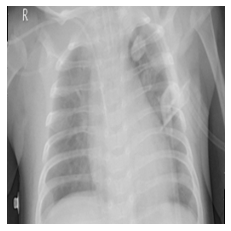

In [17]:
%matplotlib inline
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

covid_dir = os.path.join('/content/dataset_fin/train/covid')
normal_dir = os.path.join('/content/dataset_fin/train/normal')
pneumonia_dir = os.path.join('/content/dataset_fin/train/pneumonia')

covid_files = os.listdir(covid_dir)
print(covid_files[:10])

normal_files = os.listdir(normal_dir)
print(normal_files[:10])

pneumonia_files = os.listdir(pneumonia_dir)
print(pneumonia_files[:10])

pic_index = 2

next_covid = [os.path.join(covid_dir, fname) 
                for fname in covid_files[pic_index-2:pic_index]]
next_normal = [os.path.join(normal_dir, fname) 
                for fname in normal_files[pic_index-2:pic_index]]
next_pneumonia = [os.path.join(pneumonia_dir, fname) 
                for fname in pneumonia_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_covid+next_normal+next_pneumonia):
  #print(img_path)
  # img = mpimg.imread(img_path)
  img = cv2.imread(img_path,0)
  plt.imshow(img,cmap='gray')
  plt.axis('Off')
  plt.show()

### Define

In [ ]:
'''        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening

        rotation_range = 15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False,# randomly flip images
        shear_range=0.2,
        brightness_range=(1.2, 1.5)'''

'        featurewise_center=False,  # set input mean to 0 over the dataset\n        samplewise_center=False,  # set each sample mean to 0\n        featurewise_std_normalization=False,  # divide inputs by std of the dataset\n        samplewise_std_normalization=False,  # divide each input by its std\n        zca_whitening=False,  # apply ZCA whitening\n\n        rotation_range = 15,  # randomly rotate images in the range (degrees, 0 to 180)\n        zoom_range = 0.2, # Randomly zoom image \n        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)\n        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)\n        horizontal_flip = True,  # randomly flip images\n        vertical_flip=False,# randomly flip images\n        shear_range=0.2,\n        brightness_range=(1.2, 1.5)'

# 3 Tensorflow - Keras

In [ ]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

## 3.1 Convolutional Neural Network Model

In [ ]:
# let's build the CNN model

cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))


cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(128, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(128, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(256, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))



cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'softmax', units = 3))


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

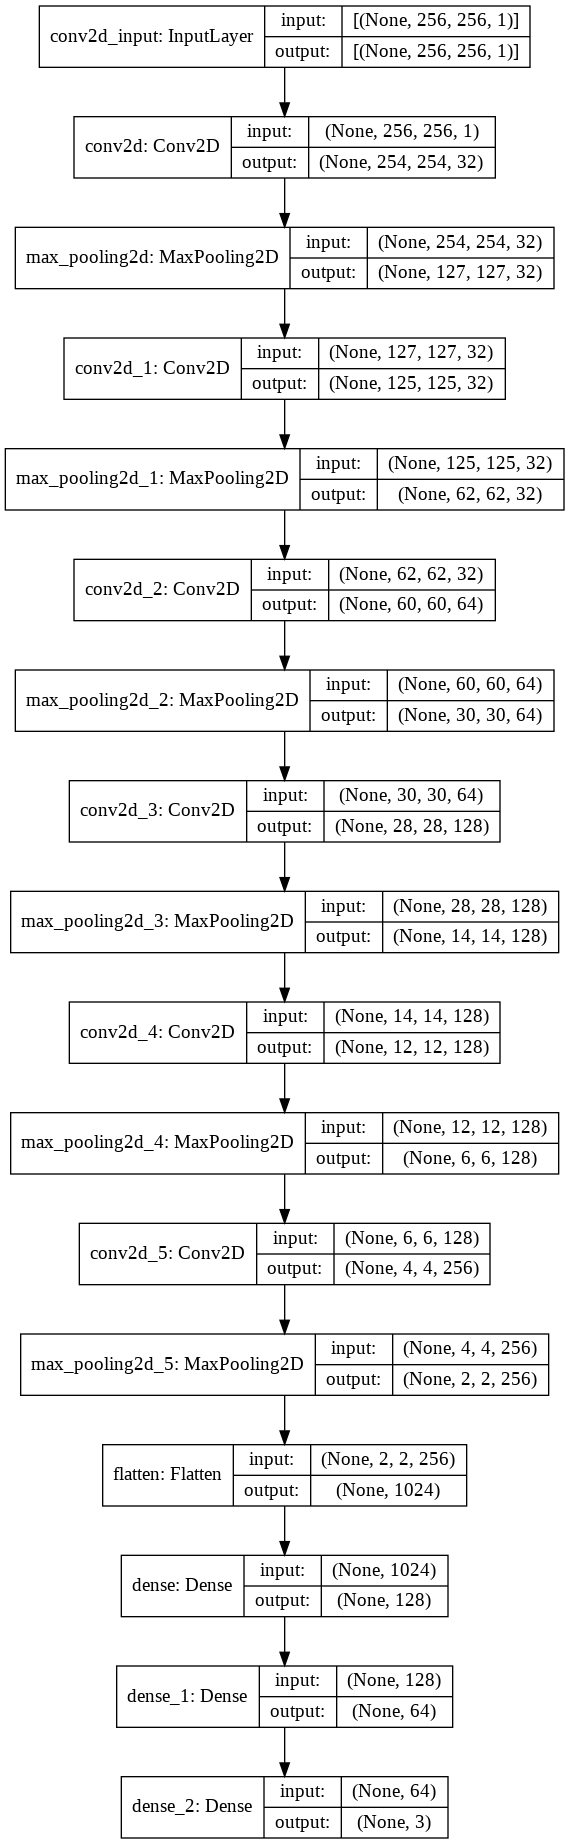

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

## 3.2 Fit Model

In [ ]:
# early = EarlyStopping(monitor="val_loss", 
#                       mode="min", 
#                       patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [learning_rate_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.0, 1: 1.0, 2: 1.0}


In [ ]:
history = cnn.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25
900/900 [==============================] - 93s 67ms/step - loss: 0.8084 - accuracy: 0.5776 - val_loss: 0.2796 - val_accuracy: 0.9123
Epoch 2/25
900/900 [==============================] - 60s 66ms/step - loss: 0.3452 - accuracy: 0.8705 - val_loss: 0.2117 - val_accuracy: 0.9213
Epoch 3/25
900/900 [==============================] - 60s 67ms/step - loss: 0.2938 - accuracy: 0.8901 - val_loss: 0.2146 - val_accuracy: 0.9197
Epoch 4/25
900/900 [==============================] - 60s 66ms/step - loss: 0.2294 - accuracy: 0.9192 - val_loss: 0.1648 - val_accuracy: 0.9410
Epoch 5/25
900/900 [==============================] - 60s 66ms/step - loss: 0.2190 - accuracy: 0.9186 - val_loss: 0.1466 - val_accuracy: 0.9500
Epoch 6/25
900/900 [==============================] - 60s 67ms/step - loss: 0.2041 - accuracy: 0.9260 - val_loss: 0.1384 - val_accuracy: 0.9513
Epoch 7/25
900/900 [==============================] - 60s 67ms/step - loss: 0.1822 - accuracy: 0.9345 - val_loss: 0.1367 - val_accuracy:

In [ ]:
cnn.save("/content/g-drive/MyDrive/cnn/cnn_25");

INFO:tensorflow:Assets written to: /content/g-drive/MyDrive/cnn/cnn_25/assets


In [ ]:
fp = "/content/g-drive/MyDrive/cnn/cnn_25"
#cnn.save(fp)

In [ ]:
cnn = load_model(fp)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


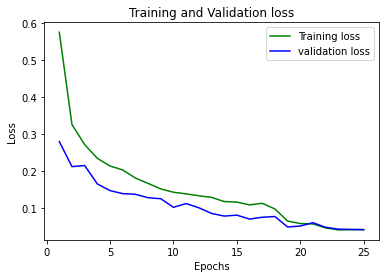

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

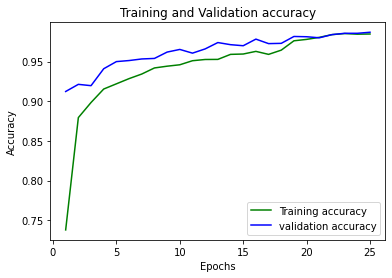

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##3.3 Evaluation

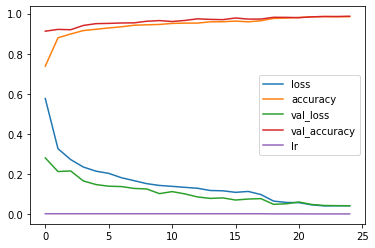

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '% and loss is',test_accu[0])

300/300 [==============================] - 6s 19ms/step - loss: 0.0366 - accuracy: 0.9873
The testing accuracy is : 98.7333357334137 % and loss is 0.03660920634865761


In [ ]:
import cv2
a = cv2.imread('/content/dataset_fin/test/normal/3326.png',0)
imgg_a = []
imgg_a.append(a)
imgg_arr=np.array(imgg_a)
imgg_arr = imgg_arr.astype(np.float32)/127.5-1
imgg_arr = np.expand_dims(imgg_arr,3)

In [ ]:
# preds = cnn.predict(imgg_arr,verbose=1)

In [ ]:
images = np.vstack([imgg_arr])
classes = cnn.predict(test)
print(classes)

[[1.00000000e+00 5.69897629e-10 5.24750965e-10]
 [9.99999285e-01 2.60162247e-09 6.60198680e-07]
 [1.00000000e+00 1.36567133e-10 1.67422350e-13]
 ...
 [1.21303465e-08 8.82820223e-06 9.99991179e-01]
 [9.26502697e-09 2.17838124e-06 9.99997854e-01]
 [3.05686427e-07 6.39796417e-05 9.99935746e-01]]


In [ ]:
classes[0]

array([1.0000000e+00, 5.6989763e-10, 5.2475096e-10], dtype=float32)

In [ ]:
predictions=classes.copy()
predictions[predictions]

In [ ]:
np.round(classes).shape

(3000, 3)

In [ ]:
images = np.vstack([imgg_arr])
classes = cnn.predict(test)
pred=[]
for i in range(0,3000):
  maxx=max(classes[i])
  if(maxx==classes[i][0]):
    pred.append(0)
  elif(maxx==classes[i][1]):
    pred.append(1)
  else:
    pred.append(2)

In [ ]:
prediction=np.array(pred)

In [ ]:
prediction.shape

(3000,)

In [ ]:
test.classes.shape

(3000,)

In [ ]:
test.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
prediction

array([0, 0, 0, ..., 2, 2, 2])

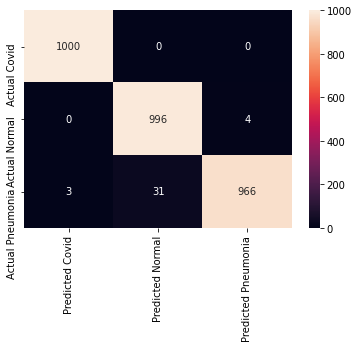

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test.classes, prediction, labels=[0,1,2]),
                  index=["Actual Covid","Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Covid","Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
 print(classification_report(y_true=test.classes, y_pred=prediction,
                            target_names =['COVID','NORMAL','PNEUMONIA']
 ))

              precision    recall  f1-score   support

       COVID       1.00      1.00      1.00      1000
      NORMAL       0.97      1.00      0.98      1000
   PNEUMONIA       1.00      0.97      0.98      1000

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
# test.reset()
# x=np.concatenate([test.next()[0] for i in range(test.__len__())])
# y=np.concatenate([test.next()[1] for i in range(test.__len__())])
# print(x.shape)
# print(y.shape)

(624, 500, 500, 1)
(624,)
